In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [20]:
df = pd.read_csv("loan_approval_data.csv")

In [21]:
df.head()

,Applicant_ID,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,1.0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,Not Graduate,Female,Private,No
1,2.0,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,NaN,Car,Semiurban,Graduate,NaN,Private,No
2,3.0,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,NaN,Urban,NaN,Female,Government,Yes
3,4.0,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,Graduate,Female,Government,No
4,5.0,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,NaN,Graduate,Male,Private,Yes


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Applicant_ID        950 non-null    float64
 1   Applicant_Income    950 non-null    float64
 2   Coapplicant_Income  950 non-null    float64
 3   Employment_Status   950 non-null    object 
 4   Age                 950 non-null    float64
 5   Marital_Status      950 non-null    object 
 6   Dependents          950 non-null    float64
 7   Credit_Score        950 non-null    float64
 8   Existing_Loans      950 non-null    float64
 9   DTI_Ratio           950 non-null    float64
 10  Savings             950 non-null    float64
 11  Collateral_Value    950 non-null    float64
 12  Loan_Amount         950 non-null    float64
 13  Loan_Term           950 non-null    float64
 14  Loan_Purpose        950 non-null    object 
 15  Property_Area       950 non-null    object 
 16  Educati

In [23]:
df.isnull().sum()

Applicant_ID          50
Applicant_Income      50
Coapplicant_Income    50
Employment_Status     50
Age                   50
Marital_Status        50
Dependents            50
Credit_Score          50
Existing_Loans        50
DTI_Ratio             50
Savings               50
Collateral_Value      50
Loan_Amount           50
Loan_Term             50
Loan_Purpose          50
Property_Area         50
Education_Level       50
Gender                50
Employer_Category     50
Loan_Approved         50
dtype: int64

In [24]:
df.describe()

,Applicant_ID,Applicant_Income,Coapplicant_Income,Age,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000
mean,501.220000,10852.571579,5082.455789,39.971579,1.474737,676.033684,1.950526,0.347263,9940.452632,24802.792632,20522.825263,48.000000
std,289.608451,5061.632859,2943.161570,11.139797,1.105067,71.346015,1.406246,0.144341,5860.736885,14345.696031,11504.142575,24.245322
min,1.000000,2009.000000,1.000000,21.000000,0.000000,550.000000,0.000000,0.100000,65.000000,36.000000,1015.000000,12.000000
25%,250.250000,6730.750000,2472.750000,30.250000,1.000000,616.250000,1.000000,0.220000,4760.250000,12698.250000,9806.250000,24.000000
50%,499.500000,10548.000000,5205.500000,40.000000,1.000000,678.000000,2.000000,0.340000,9880.500000,24321.000000,21210.500000,48.000000
75%,752.750000,15190.000000,7620.750000,49.000000,2.000000,737.000000,3.000000,0.480000,15074.500000,36947.000000,30263.000000,72.000000
max,1000.000000,19988.000000,9996.000000,59.000000,3.000000,799.000000,4.000000,0.600000,19996.000000,49954.000000,39995.000000,84.000000


# data handeling
# FIlling missing data
# for numerical values like age, loan we prefer average value (mean) to fill in place of missing value
# for categorical value like gender there we fill value using mode (based on majority) 

In [25]:

categorical_cols = df.select_dtypes(include = ("object")).columns

numerical_cols = df.select_dtypes(include = ("float64")).columns


In [26]:
categorical_cols

Index(['Employment_Status', 'Marital_Status', 'Loan_Purpose', 'Property_Area',
       'Education_Level', 'Gender', 'Employer_Category', 'Loan_Approved'],
      dtype='object')

In [27]:
numerical_cols

Index(['Applicant_ID', 'Applicant_Income', 'Coapplicant_Income', 'Age',
       'Dependents', 'Credit_Score', 'Existing_Loans', 'DTI_Ratio', 'Savings',
       'Collateral_Value', 'Loan_Amount', 'Loan_Term'],
      dtype='object')

In [28]:
from sklearn.impute import SimpleImputer

num_imp = SimpleImputer(strategy = "mean") # It will handle numerical missing data
df[numerical_cols] = num_imp.fit_transform(df[numerical_cols])

In [29]:
df.head() #here we can see that our missing numerical values are filled

,Applicant_ID,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,1.0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,Not Graduate,Female,Private,No
1,2.0,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,48.0,Car,Semiurban,Graduate,NaN,Private,No
2,3.0,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,NaN,Urban,NaN,Female,Government,Yes
3,4.0,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,Graduate,Female,Government,No
4,5.0,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,NaN,Graduate,Male,Private,Yes


In [30]:
cat_imp = SimpleImputer(strategy = "most_frequent") # It will handle categorical missing data
df[categorical_cols] = cat_imp.fit_transform(df[categorical_cols])

In [31]:
df.head() # now categorcial values are even filled

,Applicant_ID,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,1.0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,Not Graduate,Female,Private,No
1,2.0,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,48.0,Car,Semiurban,Graduate,Male,Private,No
2,3.0,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,Business,Urban,Graduate,Female,Government,Yes
3,4.0,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,Graduate,Female,Government,No
4,5.0,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,Urban,Graduate,Male,Private,Yes


In [32]:
df.isnull().sum() #it means there's no null value left in any of the columns (verification)

Applicant_ID          0
Applicant_Income      0
Coapplicant_Income    0
Employment_Status     0
Age                   0
Marital_Status        0
Dependents            0
Credit_Score          0
Existing_Loans        0
DTI_Ratio             0
Savings               0
Collateral_Value      0
Loan_Amount           0
Loan_Term             0
Loan_Purpose          0
Property_Area         0
Education_Level       0
Gender                0
Employer_Category     0
Loan_Approved         0
dtype: int64

In [33]:
#Exploratory Data analysis - to check relations btw different type of features or checking relatio

Text(0.5, 1.0, 'Is Loan Approved or not?')

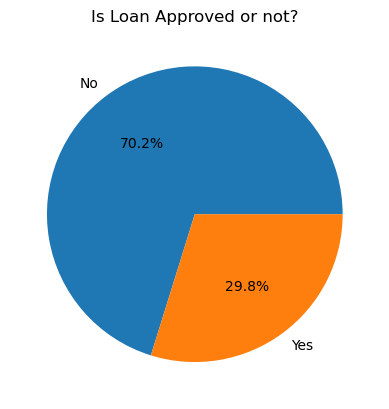

In [40]:
classes_count = df["Loan_Approved"].value_counts()
plt.pie(classes_count, labels = ["No","Yes"], autopct= "%1.1f%%")

plt.title("Is Loan Approved or not?")

[Text(0, 0, '621'), Text(0, 0, '379')]

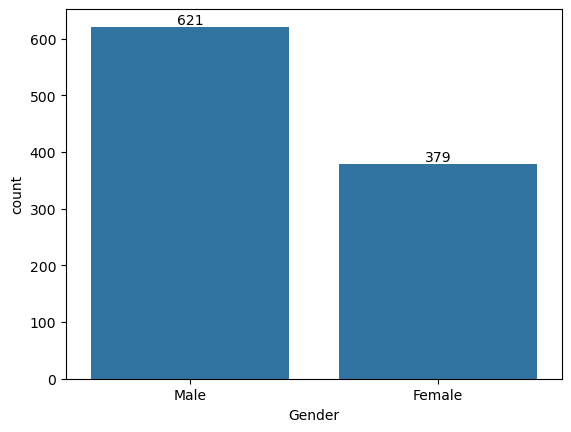

In [45]:
#analyze categories
gender_count = df["Gender"].value_counts()
ax = sns.barplot(gender_count)
ax.bar_label(ax.containers[0])
# similarly we can analyze different type of categories

<Axes: xlabel='Applicant_Income', ylabel='Count'>

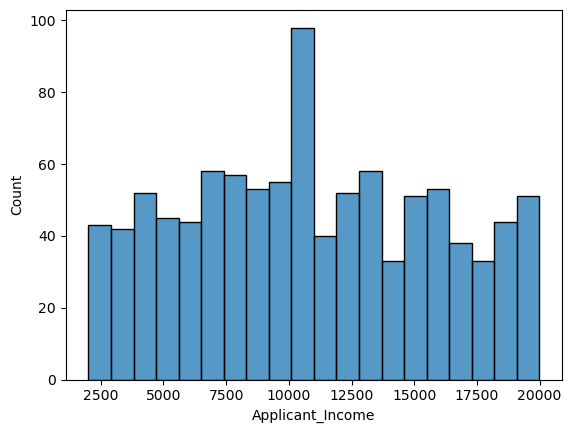

In [46]:
#analyze income
sns.histplot(
    data = df,
    x = "Applicant_Income",
    bins = 20,
)

<Axes: xlabel='Loan_Approved', ylabel='Applicant_Income'>

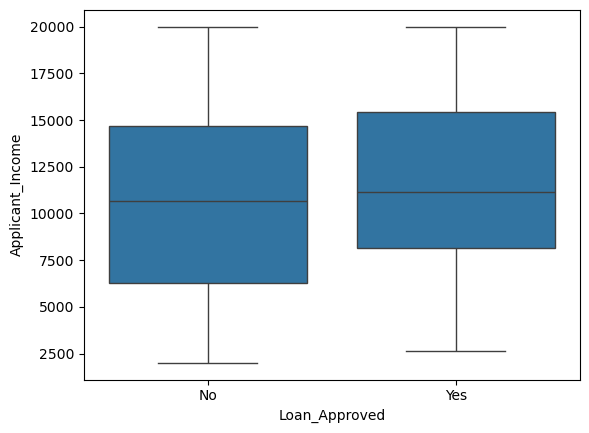

In [50]:
#finding Outliers - using box plot
sns.boxplot(
    data = df,
    x = "Loan_Approved",
    y = "Applicant_Income",
)

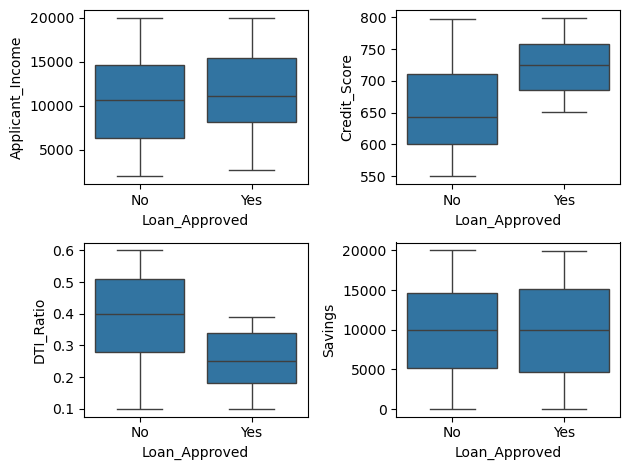

In [55]:
fig, axes = plt.subplots(2,2)
sns.boxplot(ax = axes[0,0], data = df, x = "Loan_Approved", y = "Applicant_Income",)
sns.boxplot(ax = axes[0,1], data = df, x = "Loan_Approved", y = "Credit_Score",)
sns.boxplot(ax = axes[1,0], data = df, x = "Loan_Approved", y = "DTI_Ratio",)
sns.boxplot(ax = axes[1,1], data = df, x = "Loan_Approved", y = "Savings",)

plt.tight_layout()

<Axes: xlabel='Credit_Score', ylabel='Count'>

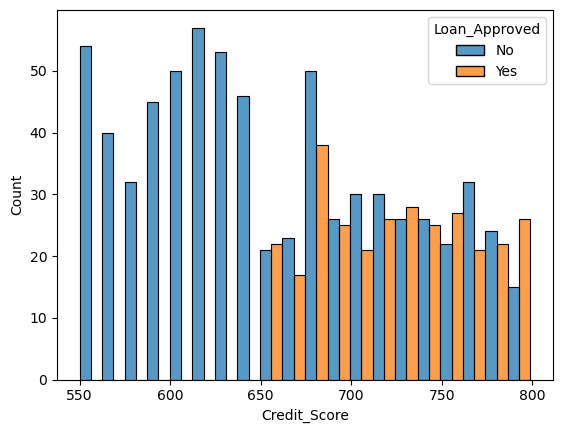

In [59]:
# credit score with loan approved
sns.histplot(
    data = df,
    x = "Credit_Score",
    hue = "Loan_Approved",
    bins = 20,
    multiple = "dodge",
)
# it means loans are approved only if credit_score>650 

In [61]:
# Remove applicant ID - as it is of no use
df = df.drop("Applicant_ID", axis = 1)

In [62]:
df.head()

,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,Not Graduate,Female,Private,No
1,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,48.0,Car,Semiurban,Graduate,Male,Private,No
2,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,Business,Urban,Graduate,Female,Government,Yes
3,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,Graduate,Female,Government,No
4,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,Urban,Graduate,Male,Private,Yes


In [64]:
#Encoding
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
df["Education_Level"] = le.fit_transform(df["Education_Level"])
df["Loan_Approved"] = le.fit_transform(df["Loan_Approved"])



In [65]:
df.head()

,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,1,Female,Private,0
1,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,48.0,Car,Semiurban,0,Male,Private,0
2,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,Business,Urban,0,Female,Government,1
3,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,0,Female,Government,0
4,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,Urban,0,Male,Private,1


In [90]:
cols = ["Employment_Status", "Marital_Status", "Loan_Purpose", "Property_Area", "Gender", "Employer_Category"]

ohe = OneHotEncoder(drop = "first", sparse_output = False, handle_unknown = "ignore")
encoded = ohe.fit_transform(df[cols])
encoded_df = pd.DataFrame(encoded, columns=ohe.get_feature_names_out(cols), index = df.index)

KeyError: "None of [Index(['Employment_Status', 'Marital_Status', 'Loan_Purpose', 'Property_Area',\n       'Gender', 'Employer_Category'],\n      dtype='object')] are in the [columns]"

In [91]:
encoded_df.head()

,Employment_Status_Salaried,Employment_Status_Self-employed,Employment_Status_Unemployed,Marital_Status_Single,Loan_Purpose_Car,Loan_Purpose_Education,Loan_Purpose_Home,Loan_Purpose_Personal,Property_Area_Semiurban,Property_Area_Urban,Gender_Male,Employer_Category_Government,Employer_Category_MNC,Employer_Category_Private,Employer_Category_Unemployed
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


In [93]:
df = pd.concat([df.drop(columns = cols), encoded_df], axis = 1)

KeyError: "['Employment_Status' 'Marital_Status' 'Loan_Purpose' 'Property_Area'\n 'Gender' 'Employer_Category'] not found in axis"

In [96]:
df.head()
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 0 to 999
Data columns (total 58 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Applicant_Income                 1000 non-null   float64
 1   Coapplicant_Income               1000 non-null   float64
 2   Age                              1000 non-null   float64
 3   Dependents                       1000 non-null   float64
 4   Credit_Score                     1000 non-null   float64
 5   Existing_Loans                   1000 non-null   float64
 6   DTI_Ratio                        1000 non-null   float64
 7   Savings                          1000 non-null   float64
 8   Collateral_Value                 1000 non-null   float64
 9   Loan_Amount                      1000 non-null   float64
 10  Loan_Term                        1000 non-null   float64
 11  Education_Level                  1000 non-null   float64
 12  Loan_Approved             